Setting up the functions to perform the training and data recording

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from time import time
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

crime = pd.read_csv('crime_final.csv')
crime.head()

,Unnamed: 0,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long
0,0,1,1,1,1,2018,10,1,20,42.262608,-71.121186
1,1,2,2,2,1,2018,8,2,20,42.352111,-71.135311
2,2,3,3,3,1,2018,10,1,19,42.308126,-71.076930
3,3,4,4,4,1,2018,10,1,20,42.359454,-71.059648
4,4,5,5,5,1,2018,10,1,20,42.375258,-71.024663


In [2]:
features = crime.drop('SHOOTING',axis=1)
labels = crime['SHOOTING']

#split features and labels into train (50%), test (25%), and validation (25%) sets
#f for features
#l for labels
def split_features(features,labels):
    f_train, f_test, l_train, l_test = train_test_split(features,labels, test_size=0.5,random_state=42)
    f_val, f_test, l_val, l_test = train_test_split(f_test,l_test, test_size=0.5,random_state=42)
    
    return f_train, f_test, f_val, l_train, l_test, l_val

In [3]:
def svm_trainer(features,labels,train_count):
    svc = SVC()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        svc.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

#train_times = svm_trainer(features,labels,train_count=10)
#print("done!")

In [4]:
def knn_trainer(features,labels,train_count):
    knn = KNeighborsClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        knn.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

#train_times = knn_trainer(features,labels,train_count=10)
#print("done!")

In [5]:
def logistic_regression_trainer(features,labels,train_count):
    lr = LogisticRegression()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        lr.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

#train_times = logistic_regression_trainer(features,labels,train_count=10)
#print("done!")

In [6]:
def multilayer_perceptron_trainer(features,labels,train_count):
    MLP = MLPClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        MLP.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

#train_times = multilayer_perceptron_trainer(features,labels,train_count=10)
#print("done!")

In [7]:
def random_forest_trainer(features,labels,train_count):
    rf = RandomForestClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,_,_,l_train,_,_ = split_features(features,labels)
        t0 = time()
        rf.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 10 == 0:
            print('round %d' % (ii))
            
    return train_times

#train_times = random_forest_trainer(features,labels,train_count=10)
#print("done!")

In [8]:
train_iter = 10
knn_times = knn_trainer(features,labels,train_count=train_iter)
lr_times = logistic_regression_trainer(features,labels,train_count=train_iter)
#svm_times = svm_trainer(features,labels,train_count=train_iter)
rf_times = random_forest_trainer(features,labels,train_count=train_iter)
#mlp_times = multilayer_perceptron_trainer(features,labels,train_count=train_iter)

round 0
round 0
round 0


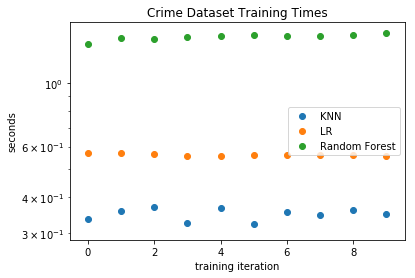

In [11]:
plt.scatter(range(len(knn_times)),knn_times,label="KNN")
plt.scatter(range(len(lr_times)),lr_times,label="LR")
#plt.scatter(range(len(svm_times)),svm_times,label='SVM')
plt.scatter(range(len(rf_times)),rf_times,label='Random Forest')
#plt.scatter(range(len(mlp_times)),mlp_times,label='MLP')
plt.title('Crime Dataset Training Times')
plt.yscale('log')
plt.xlabel('training iteration')
plt.ylabel('seconds')
plt.legend(loc='best')
plt.savefig('crime_training_times_log.png')
plt.show()